In [1]:
#1. Load the dataset:

import pandas as pd
df = pd.read_csv('E:\\NTI\\NTI eme\\3. AI\Dataset\\AI task\\sampled_NF-CSE-CIC-IDS2018-v2.csv')

<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Sayed Mohamed\AppData\Local\Temp\ipykernel_108\3718489733.py:4: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('E:\\NTI\\NTI eme\\3. AI\Dataset\\AI task\\sampled_NF-CSE-CIC-IDS2018-v2.csv')


In [2]:
#prprocessing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188938 entries, 0 to 188937
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IPV4_SRC_ADDR                188938 non-null  object 
 1   L4_SRC_PORT                  188938 non-null  int64  
 2   IPV4_DST_ADDR                188938 non-null  object 
 3   L4_DST_PORT                  188938 non-null  int64  
 4   PROTOCOL                     188938 non-null  int64  
 5   L7_PROTO                     188938 non-null  float64
 6   IN_BYTES                     188938 non-null  int64  
 7   IN_PKTS                      188938 non-null  int64  
 8   OUT_BYTES                    188938 non-null  int64  
 9   OUT_PKTS                     188938 non-null  int64  
 10  TCP_FLAGS                    188938 non-null  int64  
 11  CLIENT_TCP_FLAGS             188938 non-null  int64  
 12  SERVER_TCP_FLAGS             188938 non-null  int64  
 13 

In [3]:
df.isnull().sum()

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

In [4]:
#1-Handle missing values:
df.dropna(inplace=True)

In [5]:
#2-Drop source and destination IP addresses and other non-numeric columns
df = df.drop(columns=['Src IP', 'Dst IP'], errors='ignore')

In [6]:
#3- Encode categorical columns: If there are meaningful categorical features (e.g., Protocol, Flags), encode them:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])


In [7]:
#4- Split features and target:
X = df.drop('Label', axis=1)
y = df['Label']

In [8]:
#5. Split into training and testing sets:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
#6- Feature scaling
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)


In [10]:
#models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#1. Logistic Regression (LR)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_LR= accuracy_score(y_test, y_pred)*100
print(f'Logistic Regression Accuracy: {accuracy_LR:.2f}%')

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.96     33263
     Anomaly       0.66      0.82      0.73      4525

    accuracy                           0.93     37788
   macro avg       0.82      0.88      0.84     37788
weighted avg       0.94      0.93      0.93     37788

Logistic Regression Accuracy: 92.70%


c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [11]:
#2. Decision Tree (DT)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_DT = accuracy_score(y_test, y_pred)*100
print(f'Decision Tree Accuracy: {accuracy_DT:.2f} %')

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     33263
     Anomaly       1.00      1.00      1.00      4525

    accuracy                           1.00     37788
   macro avg       1.00      1.00      1.00     37788
weighted avg       1.00      1.00      1.00     37788

Decision Tree Accuracy: 100.00 %


In [12]:
#3. RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_RF = accuracy_score(y_test, y_pred)*100
print(f'RandomForestClassifier Accuracy: {accuracy_RF:.2f} %')

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     33263
     Anomaly       1.00      1.00      1.00      4525

    accuracy                           1.00     37788
   macro avg       1.00      1.00      1.00     37788
weighted avg       1.00      1.00      1.00     37788

RandomForestClassifier Accuracy: 100.00 %


In [13]:
#4. XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test_scaler)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_xg = accuracy_score(y_test, y_pred)*100
print(f'RandomForestClassifier Accuracy: {accuracy_xg:.2f} %')



              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     33263
     Anomaly       1.00      1.00      1.00      4525

    accuracy                           1.00     37788
   macro avg       1.00      1.00      1.00     37788
weighted avg       1.00      1.00      1.00     37788

RandomForestClassifier Accuracy: 100.00 %


In [14]:
# 5. Support Vector Machine (SVM)
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_SVM = accuracy_score(y_test, y_pred)*100
print(f'SVM Accuracy: {accuracy_SVM:.2f}%')

c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94     33263
     Anomaly       0.00      0.00      0.00      4525

    accuracy                           0.88     37788
   macro avg       0.44      0.50      0.47     37788
weighted avg       0.77      0.88      0.82     37788

SVM Accuracy: 88.03%


c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
#6. KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_KNN = accuracy_score(y_test, y_pred)*100
print(f'KNeighborsClassifier Accuracy: {accuracy_KNN:.2f} %')

c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94     33263
     Anomaly       0.87      0.02      0.04      4525

    accuracy                           0.88     37788
   macro avg       0.87      0.51      0.49     37788
weighted avg       0.88      0.88      0.83     37788

KNeighborsClassifier Accuracy: 88.26 %


In [16]:
#7. GaussianNB
from sklearn.naive_bayes import GaussianNB
model = KNeighborsClassifier()
model.fit(X_train_scaler, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))
accuracy_NV = accuracy_score(y_test, y_pred)*100
print(f'GaussianNB Accuracy: {accuracy_NV:.2f} %')

c:\Users\Sayed Mohamed\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94     33263
     Anomaly       0.87      0.02      0.04      4525

    accuracy                           0.88     37788
   macro avg       0.87      0.51      0.49     37788
weighted avg       0.88      0.88      0.83     37788

GaussianNB Accuracy: 88.26 %


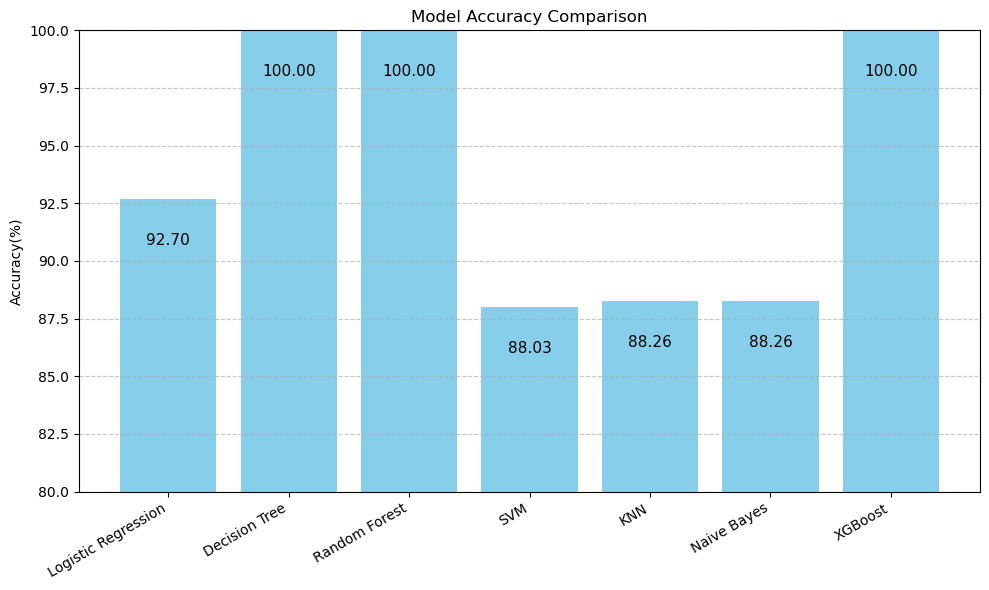

In [17]:
# Evalute models
import matplotlib.pyplot as plt

# Example accuracy scores (replace with your actual model results)
model_names = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
    "SVM",
    "KNN",
    "Naive Bayes",
    "XGBoost"
]

accuracies = [
    accuracy_LR,  # Logistic Regression
    accuracy_DT,  # Decision Tree
    accuracy_RF,  # Random Forest
    accuracy_SVM,  # SVM
    accuracy_KNN,  # KNN
    accuracy_NV,  # GaussianNB
    accuracy_xg   # XGBoost
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')
plt.ylim(80, 100)
plt.ylabel("Accuracy(%)")
plt.title("Model Accuracy Comparison")

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() -2,
             f"{acc:.2f}", ha='center', color='black', fontsize=11)

plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
